# KoNLPy(MeCab 클래스) 설치 & import
- LMS에는 이미 설치되어 있음
- 설치 링크 : [KoNLPy 0.5.2 documentation](https://konlpy.org/ko/latest/install/)
- 본 노트북은 LMS 내부 Jupyter Notebook을 이용했음을 알립니다.

In [1]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


<br>

# 데이터 다운로드 및 분석

### 라이브러리 import

In [2]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

- cloud shell
```
wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
mkdir -p ~/aiffel/sp_tokenizer/data
mv korean-english-park.train.tar.gz ~/aiffel/sp_tokenizer/data
cd ~/aiffel/sp_tokenizer/data
tar -xzvf korean-english-park.train.tar.gz
```

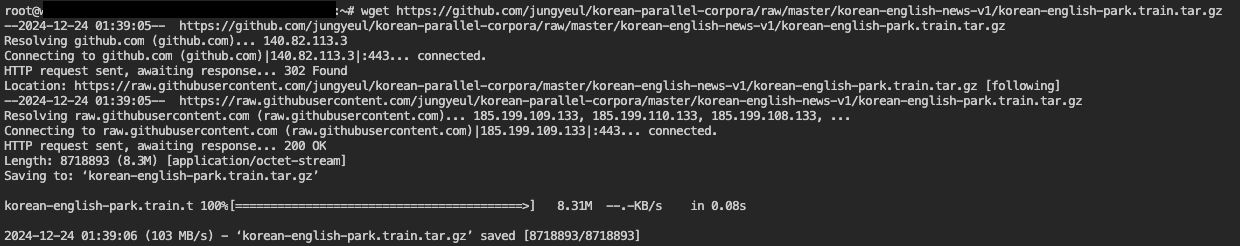
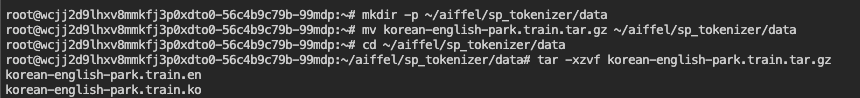

### 데이터 정보
- 한국어 형태소 분석, 품사 태깅, 기계 번역 연구를 위해 공개된 데이터
- 소설책 1권 분량의 내용
- 그 중 **한국어-영어 병렬** 말뭉치의 한국어 부분 사용 예정
  - 전체 병렬 말뭉치: 추후 번역기 만들며 사용 예정

- 참고 사이트: [jungyeul/korean-parallel-corpora](https://github.com/jungyeul/korean-parallel-corpora)

### 데이터 불러오기

In [3]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


<br>

### 데이터 사용 기준에 따른 확인
- 문장: 94123개
- 각 문장의 길이 분석 ➡️ 지나치게 긴 데이터의 삭제(연산량 감소) + 지나치게 짧은 데이터 검증
- 문장 `최단 길이`, `최장 길이`, `평균 길이`를 구하고, 문장 길이 분포 시각화(막대 그래프)

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


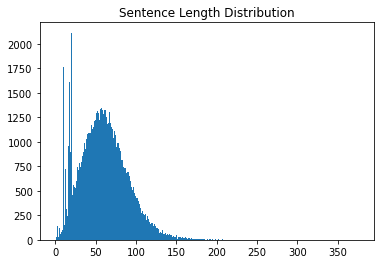

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

#### 🔎 최단 길이는 1, 최장 길이는 377

<br>

### 길이 1 문장 확인하기

In [5]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


#### 🔎 노이즈 데이터임을 확인할 수 있음
- 길이별로 더 확인해보자.

<br>

### 문장 수가 1,500을 초과하는 문장 길이 추출

In [6]:
for idx, _sum in enumerate(sentence_length):
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


### 길이가 11인 문장 내용 확인

In [7]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

#### 🔎 중복 데이터가 있음을 알 수 있음.
- 중복 제거 진행

<br>

### 중복 데이터 제거
- `set` 이용

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


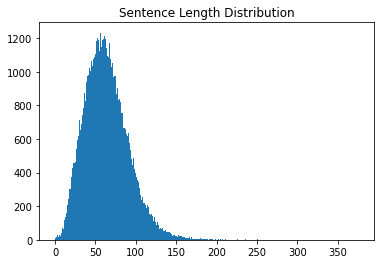

In [8]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

---

### 데이터 현황
- 이전
```
Data Size: 94123
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60
```
  - 특성 : 길이 1의 경우 노이즈 데이터 있음 + 길이가 11인 문장에서 중복 데이터 발견

<br>

- 이후
```
Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64
```
  - 특성 : 노이즈, 중복 데이터 제거 ➡️ 데이터 개수 17,000개 감소
---

<br>

### 모든 데이터를 다 사용할 것인지?
- 추후, 미니 배치 적용을 고려한다면 연산이 매우 비효율적
- 미니 배치 특성 : 크기 동일 ➡️ 가장 긴 데이터를 기준으로 Padding 처리 필요
  - 길이별 정렬 후 미니 배치를 구성한다면, Padding이 최소화될 수 있으나 편향 발생 우려가 있음

#### `길이 150 이상 데이터`, `길이 10 미만 데이터(노이즈)` 제거 후 사용하는 것으로 결정

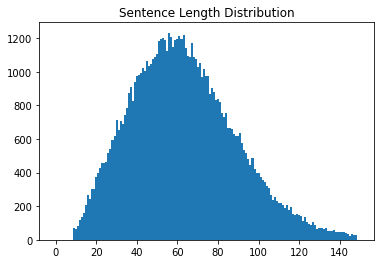

In [9]:
max_len = 150
min_len = 10

filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

<br>
<br>
<br>


# 1️⃣ Tenser를 이용한 Encoding
---


# 공백 기반 토큰화
> 💬 Corpus
> - Tokenized Sentence's List
> - NLP에서 분석 및 학습을 위해 사용하는 텍스트 데이터 집합을 의미

<br>


### `tokenize()` 함수
- 정제 데이터 : `filtered_corpus`
- 정제 데이터를 기반으로 토큰화 ➡️ `split_corpus`에 저장 ➡️ 단어 사전, Tenser 데이터 추출
- 단어 사전 크기도 확인

In [10]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [11]:
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

### 공백 기반 토큰화 실행 & 단어 사전 길이 확인

In [12]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


### 단어 사전 확인

In [13]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


---
### 공백 기반 토큰화 정리
- 사용 함수 : `tokenize()` 함수
- 단어 사전 크기 : 237435
---

---

### 문제점
- 데이터 유사성이 고려되지 않음
  - `밝혔다`와 같은 단어는 밝히다, 밝다 등 유사성이 있는 단어와 다른 단어로 분류되는 문제가 발생됨
  - 이런 방식이 계속되면 단어사전이 불필요하게 커지며 연산량도 비효율적으로 증가됨

<br>

- 해결 방법: `밝` + `혔다` 방식의 토큰화
  - `밝`과 연관된다면 의미를 파악할 수 있게 되니 문제 해결 가능
---

<br>

# 형태소 기반 토큰화
- 한국어 형태소 분석기 : Khaiii, KoNLPy, ...
- KoNLPy 중, **MeCab 클래스** 이용
  - 가장 성능이 준수함

### MeCab 기반 단어사전 만들기
- `mecab_split()` 함수
  - `mecab.morphs()`으로 형태소 분석

In [15]:
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

### 형태소 기반 토큰화 진행 & 단어 사전 길이 확인

In [16]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


---

### 형태소 기반 토큰화 정리
- 사용 함수 : `mecab_split()`
- 단어 사전 길이 : 52279

---

---

### 인사이트
- **한국어**의 경우, 그 특성에 따라서 공백 기반 토큰화보다는 **형태소 기반 토큰화**가 유리
  - 학습 측면 : 연산량 감소, 빠른 학습, 모델이 튜닝하는 파라미터 수도 줄어서 학습이 잘됨
  
<br>

### 더 좋은 성능을 내는 사례
- SentencePiece(subword 기반 토큰화)보다 ➡️ **형태소 분석기**가 좋은 성능을 내는 사례들이 있음
  - KorBERT : ETRI에서 발표한 한국어 BERT 모델
    - 참고 자료 : [공공 인공지능 오픈 API·DATA 서비스 포털](https://aiopen.etri.re.kr/bertModel)

---

---

### 생각해보기 - (1)
🧐 <br>
구글의 Word Piece 기반 한국어 언어모델이 엑소브레인의 Word Piece 기반 한국어 언어모델보다 전체적으로 성능이 크게 떨어지는 것은 어떤 의미일까?<br>
(언어모델(BERT)을 훈련시킨 원리는 동일하며, 토크나이저가 구성된 원리도 Word Piece 기반으로 동일)

<br>

🙌<br>
크게 "Train 데이터 자체"의 차이, 사전을 구축하는 방식 내 "한국어 특화 설계"의 차이에 있다고 생각이 듦.
- Train Data
  - 구글 : 대규모 코퍼스(공개 데이터 이용) ➡️ 한국어 특유의 구어체 등과 같은 용어들의 다양성이 반영되지 않을 가능성이 높음
  - 엑소브레인 : 한국어 중심 대규모 코퍼스뿐만 아니라 다양한 도메인에서의 데이터 및 대화 데이터 포함 ➡️ 다양성이 더 잘 반영되었을 가능성이 높아 보임
  
<br>

- 한국어 특화 설계
  - 구글 : 영어 모델을 기본으로 사용하며 그 모델을 한국어에 맞춰서 변환했다면 ➡️ 한국어의 특성 중 하나인 띄어쓰기 및 조사 등의 처리가 제대로 이뤄지지 않았을 가능성이 있어보임
  - 엑소브레인 : 한국어 특유의 띄어쓰기, 조사, 어절, 형태소 단위, 어미 변형 등의 많은 요소들이 고려됨 ➡️ 한국어의 특성인 교착어 특성이 잘 처리되었을 가능성이 있음

<br>

#### 답안 참고
- 구글 BERT 모델
  - 한국어 전용 코퍼스 바탕의 훈련이 아닌 Multilingual 코퍼스 바탕의 훈련
  - Word Piece 모델 안에 포함된 subword : 한국어가 아닌 언어도 많이 섞여 있기 때문에 한국어 특화가 아님

- 엑소브레인 BERT 모델
  - 한국어 코퍼스 특화 형태로 언어 모델 및 토크나이저 훈련

---

---
### 생각해보기 - (2)
🧐 <br>
엑소브레인의 BERT에 두 가지 버전이 있는데, 이 중 한국어 전용 형태소분석기 토크나이저를 사용한 버전이 WordPiece 모델 토크나이저를 사용한 버전보다 대체로 성능이 좋다는 것의 시사점은 무엇일까?

<br>

🙌 <br>
형태소 분석기가 WordPiece보다 한국어가 가진 고유한 언어적 특성(ex. 교착어 등)이 잘 반영되었기 때문에 대체로 성능이 좋다고 시사할 수 있다고 생각함.<br>
즉, 한국어의 특성을 세밀하게 잘 반영하는 것이 성능 향상의 결정적 역할을 한다는 것으로 볼 수 있음.

<br>

#### 답안 참고
- WordPiece 모델
  - 언어 각각의 문법 및 의미적 사전 정보는 반영되지 않음 -> 순수히 통계적 빈도 기반으로 그 패턴을 사전에 등재한 것임
- 형태소분석기
  - 한국어 문법 및 의미 정보가 잘 반영되어 정확히 동작 -> 기존의 좋은 성능을 자랑했던 Subword 기반 토크나이저보다 성능이 좋을 수 있음
---

---

### 생각해보기 - (3)
🧐 <br>
정교한 형태소분석기를 활용한 모델의 성능이 더 좋을 수 있음에도 불구하고 **현장에서 SentencePiece 같은 Subword 기반 토크나이저가 더욱 각광받는 이유**는?

<br>

🙌 <br>
한국의 데이터가 물론, 한국어의 비중이 가장 높겠지만 다른 언어의 혼재가 많이 될 것인데 한국어에만 특화되어 있다면 오히려 반대로 남은 단어들을 제대로 해석하지 못할 가능성이 생기는 것이라고 판단됨. <br>
또한, 신조어 및 희귀 단어 등의 처리 역시 수월하지 못할 것으로 생각됨. <br>
그렇기 때문에 많은 언어들에 호환성이 좋은 SentencePiece와 같은 토크나이저가 아직까지 보편적으로 사용되는 것으로 보임.

<br>

#### 답안 참고
- 형태소 분석기
  - 언어의 변동성 : 정교한 형태소 분석기 성능 유지를 위해서는 지속적 데이터 관리 및 유지보수 작업 필요
- SentencePiece 모델
  - 코퍼스 데이터에서 쉽게 추출 및 생성 가능
  - Subword 기반 -> OOV 문제도 robust한 대처가 가능
  - 언어가 다앙하고 중립적 -> 여러 언어가 섞인 텍스트 처리에 유리
  - 특정 언어 부가지식의 부재 -> 상관없이 작업 진행 가능
  - 언어 특화 토크나이저와 비교했을 때에도 나쁘지 않은 성능이 나오기 때문

---

<br>
<br>
<br>

# 2️⃣ 모델이 생성한 Tenser ➡️ 문장으로 Decoding
---
### `mecab_tensor[100]`을 원문으로 돌리기

#### `tokenizer.sequences_to_texts()` 함수
- mecab_tensor[100]을 단어 단위로 복원 및 출력

In [21]:
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

경고 사진 들 은 기존 경고 문구 를 대체 하 게 된다 .


### tokenizer.index_word 사용
- 텍스트의 숫자 시퀀스 토큰화 후 ➡️ 숫자 인덱스는 키, 단어를 값으로 해서 딕셔너리 생성해 사용

In [22]:
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

경고 사진 들 은 기존 경고 문구 를 대체 하 게 된다 . 


<br>

# 회고
오늘은 단어 사전을 만드는 간단한 노드를 진행했습니다. <br>
한국어 형태소 분석, 품사 태깅, 기계 번역 연구를 위해 공개된 데이터를 사용해 간단히 공백 기반 토큰화와 형태소 기반 토큰화를 진행했는데 이 분석을 통해 "한국어의 경우, 형태소, 교착어 등의 특성이 있는 언어이기 때문에 공백 기반 토큰화를 절대 지양해야한다."는 점을 명확히 알 수 있었어요. <br>
다만, 한국어에 특화된 경우일수록 무조건적인 성능 향상이 보장되지는 않을 수 있다는 점도 깨달을 수 있었습니다. <br>
특정 언어에 특정된다는 말은, 모델이 그 언어를 잘 반영할 수 있으면서도 동시에 다른 언어에 대한 범용성은 오히려 크게 떨어질 수 있다는 맹점을 발견할 수 있었어요☺️ <br>